<a href="https://colab.research.google.com/github/tanmay023/GREEN-SKILL-AND-AI/blob/main/day7_shell_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#k-means algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('environmental factors.csv')

In [ ]:
print(df)

      temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0       22.490802  52.418449   19.599966        337.165056        369.020837   
1       34.014286  49.974726    8.690240        256.681604        185.335998   
2       29.639879  40.569235   11.932794        484.024336        213.723302   
3       26.973170  66.436000   18.265613        148.540303        262.604015   
4       18.120373  58.597450   14.641787        314.535387        283.288001   
...           ...        ...         ...               ...               ...   
9995    32.153120  82.622318   24.045509        389.315259        660.200681   
9996    32.950177  32.808837   19.956484        394.037121        303.574216   
9997    33.934158  48.221908    5.389117        171.306244        774.095576   
9998    22.949760  56.599200   13.020097        245.443897        568.909821   
9999    19.342808  40.335889   10.147960        269.340664        875.536039   

      pollution_level  
0           84.

In [ ]:
print(df.head())

   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  
0        84.723658  
1        49.451704  
2        19.546561  
3        73.664179  
4        41.867814  


In [ ]:
df.describe()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.883191,60.271793,15.001008,274.421022,547.177425,50.314459
std,5.752603,17.357673,5.735475,130.047566,260.355761,28.834129
min,15.000233,30.009465,5.000962,50.002492,100.015063,0.000843
25%,19.926577,45.236748,10.074958,161.085762,319.845000,25.695648
50%,24.850572,60.353807,15.041362,275.013608,544.345473,50.609039
75%,29.800127,75.388753,19.893477,386.202314,775.429330,75.344597
max,34.994353,89.995490,24.998020,499.905217,999.974933,99.993970


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       10000 non-null  float64
 1   humidity          10000 non-null  float64
 2   wind_speed        10000 non-null  float64
 3   carbon_emissions  10000 non-null  float64
 4   solar_irradiance  10000 non-null  float64
 5   pollution_level   10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [ ]:
df.isna()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
temperature,0
humidity,0
wind_speed,0
carbon_emissions,0
solar_irradiance,0
pollution_level,0


In [ ]:
df.dtypes

,0
temperature,float64
humidity,float64
wind_speed,float64
carbon_emissions,float64
solar_irradiance,float64
pollution_level,float64


In [ ]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
       'solar_irradiance', 'pollution_level'],
      dtype='object')

In [ ]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(df)
pd.DataFrame(data_scaled,columns=df.columns).head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,-0.415900,-0.452465,0.801884,0.482494,-0.684316,1.193409
1,1.587377,-0.593258,-1.100359,-0.136414,-1.389866,-0.029923
2,0.826917,-1.135149,-0.534981,1.611824,-1.280827,-1.067119
3,0.363328,0.355146,0.569224,-0.968007,-1.093072,0.809835
4,-1.175669,-0.096466,-0.062635,0.308475,-1.013623,-0.292954


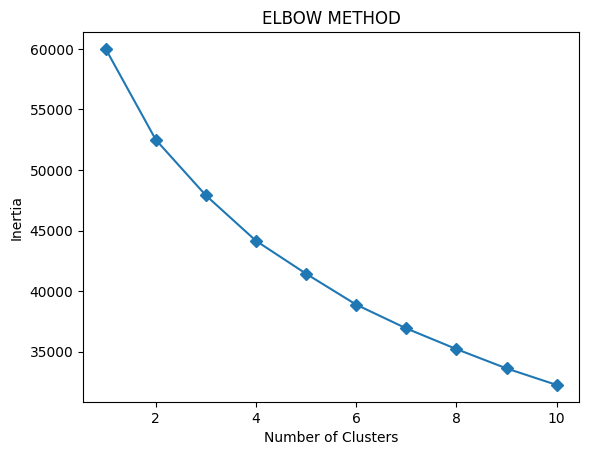

In [ ]:
inertia = []
k_range = range(1,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(k_range,inertia,marker='D')
plt.title("ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6,random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)
df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,cluster
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,4
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,5
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,3
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,4
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,4


In [ ]:
sil_score = silhouette_score(data_scaled,df['cluster'])
print('silhouette_score:',sil_score)

silhouette_score: 0.12160524577258222


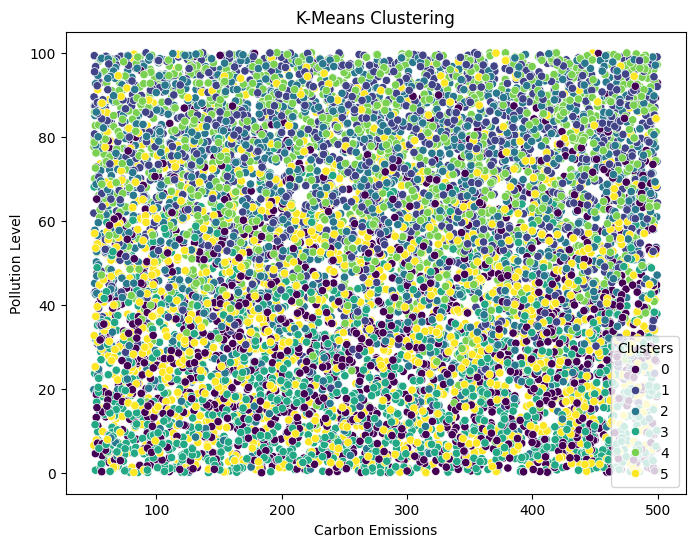

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='carbon_emissions',y='pollution_level',hue='cluster',data=df,palette='viridis')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Clusters')
plt.title("K-Means Clustering")
plt.show()

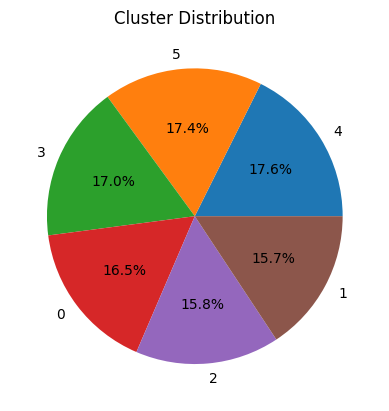

In [ ]:
from ipywidgets import Label
plt.pie(df['cluster'].value_counts(),labels=df['cluster'].unique(),autopct='%1.1f%%')
plt.title('Cluster Distribution')
plt.show()

In [ ]:
euclidean_distances = kmeans.cluster_centers_

In [ ]:
print(euclidean_distances)

[[-0.80801304 -0.6998428  -0.14161365  0.04746453  0.73412733 -0.61239087]
 [ 0.84494599 -0.8620903  -0.32445447  0.08415419  0.29138481  0.71432706]
 [-0.06536487  0.97330059  0.03002227 -0.06747411  0.90434216  0.47809719]
 [ 0.77676075 -0.01114327  0.80012837 -0.00506238 -0.28060225 -0.95780361]
 [-0.65283614 -0.10503769  0.68308765  0.06875971 -0.86011074  0.71838498]
 [ 0.01169845  0.58883687 -0.95449303 -0.11369581 -0.80799745 -0.33415155]]
